In [1]:
import pandas as pd

In [2]:
def accuracy(y_true, y_pred): 
    """ 
    Function to calculate accuracy 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: accuracy score 
    """ 
    # initialize a simple counter for correct predictions 
    correct_counter = 0 
    # loop over all elements of y_true 
    # and y_pred "together" 
    for yt, yp in zip(y_true, y_pred): 
        if yt == yp: 
            # if prediction is equal to truth, increase the counter 
            correct_counter += 1 
 
    # return accuracy 
    # which is correct predictions over the number of samples 
    return correct_counter / len(y_true) 

In [3]:
def true_positive(y_true, y_pred): 
    """ 
    Function to calculate True Positives 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: number of true positives 
    """ 
    # initialize 
    tp = 0 
    for yt, yp in zip(y_true, y_pred): 
        if yt == 1 and yp == 1: 
            tp += 1 
    return tp 
 
def true_negative(y_true, y_pred): 
    """ 
    Function to calculate True Negatives 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: number of true negatives 
    """ 
    # initialize 
    tn = 0 
    for yt, yp in zip(y_true, y_pred): 
        if yt == 0 and yp == 0: 
            tn += 1 
    return tn 
 
def false_positive(y_true, y_pred): 
    """ 
    Function to calculate False Positives 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: number of false positives 
    """ 
    # initialize 
    fp = 0 
    for yt, yp in zip(y_true, y_pred): 
        if yt == 0 and yp == 1: 
            fp += 1 
    return fp 
 
def false_negative(y_true, y_pred): 
    """ 
    Function to calculate False Negatives 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: number of false negatives 
    """ 
    # initialize 
    fn = 0 
    for yt, yp in zip(y_true, y_pred): 
        if yt == 1 and yp == 0: 
            fn += 1 
    return fn

In [4]:
def accuracy_v2(y_true, y_pred): 
    """ 
    Function to calculate accuracy using tp/tn/fp/fn 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: accuracy score 
    """ 
    tp = true_positive(y_true, y_pred) 
    fp = false_positive(y_true, y_pred) 
    fn = false_negative(y_true, y_pred) 
    tn = true_negative(y_true, y_pred) 
    accuracy_score = (tp + tn) / (tp + tn + fp + fn) 
    return accuracy_score

In [5]:
def precision(y_true, y_pred): 
    """ 
    Function to calculate precision 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: precision score 
    """ 
    tp = true_positive(y_true, y_pred) 
    fp = false_positive(y_true, y_pred) 
    precision = tp / (tp + fp) 
    return precision 

In [6]:
def recall(y_true, y_pred): 
    """ 
    Function to calculate recall 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: recall score 
    """ 
    tp = true_positive(y_true, y_pred) 
    fn = false_negative(y_true, y_pred) 
    recall = tp / (tp + fn) 
    return recall

In [7]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708, 0.0490937,  0.0191491,  0.17554844, 0.15952202, 0.03819563, 0.11639273,0.079377, 0.08584789, 0.39095342, 0.27259048, 0.03447096, 0.04644807, 0.03543574, 0.18521942, 0.05934905, 0.61977213, 0.33056815]
thresholds = [0.0490937 , 0.05934905, 0.079377, 0.08584789, 0.11114267, 0.11639273, 0.15952202, 0.17554844, 0.18521942, 0.27259048, 0.31620708, 0.33056815, 0.39095342, 0.61977213] 

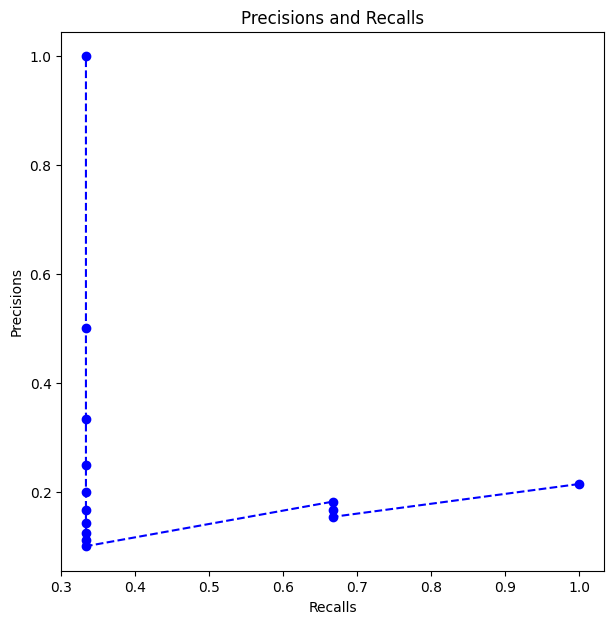

In [10]:
# graph the precisions and recalls and title for axis
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions, marker='o', linestyle='--', color='b')
plt.xlabel('Recalls')
plt.ylabel('Precisions')
plt.title('Precisions and Recalls')
plt.show()

False Positive Rate (FPR)
Definition: The proportion of actual negatives that are incorrectly identified as positive.
​
 
Importance: It tells us how often the model incorrectly flags negatives as positives, which is crucial for understanding the rate of false alarms.

In [11]:
def fpr(y_true, y_pred): 
    """ 
    Function to calculate fpr 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: fpr 
    """ 
    fp = false_positive(y_true, y_pred) 
    tn = true_negative(y_true, y_pred) 
    return fp / (tn + fp) 

## Use cases
    - Recall vs Precision: Best for imbalanced datasets where the positive class is rare (e.g., fraud detection, medical diagnosis).
    - ROC: When the classes are roughly balanced, and overall performance

In [13]:
# precisions = [] 
# recalls = [] 

tps = []
fps = []
tns = []
fns = []
# for every threshold, calculate predictions in binary 
# and append calculated precisions and recalls 
# to their respective lists 
for i in thresholds: 
    temp_prediction = [1 if x >= i else 0 for x in y_pred] 
    # p = precision(y_true, temp_prediction) 
    # r = recall(y_true, temp_prediction) 
    tp = true_positive(y_true, temp_prediction)
    fp = false_positive(y_true, temp_prediction)
    tn = true_negative(y_true, temp_prediction)
    fn = false_negative(y_true, temp_prediction)
    # precisions.append(p) 
    # recalls.append(r)
    tps.append(tp)
    fps.append(fp)
    tns.append(tn)
    fns.append(fn)
    # number of true positives
    

# create the dataframe with thresholds, precisions, and recalls
df_confusion_metrix = pd.DataFrame({'Thresholds': thresholds, 
                                      'TruePositive': tps,'FalsePositive': fps,
                                      'TrueNegative': tns,'FalseNegative': fns})

In [19]:
df_confusion_metrix["recall"] = df_confusion_metrix["TruePositive"] / (df_confusion_metrix["TruePositive"] + df_confusion_metrix["FalseNegative"])
df_confusion_metrix["precision"] = df_confusion_metrix["TruePositive"] / (df_confusion_metrix["TruePositive"] + df_confusion_metrix["FalsePositive"])
df_confusion_metrix["FalsePositiveRatio"] = df_confusion_metrix["FalsePositive"] / (df_confusion_metrix["FalsePositive"] + df_confusion_metrix["TrueNegative"])

# add F1 score to the dataframe
df_confusion_metrix["f1_score"] = 2 * (df_confusion_metrix["precision"] * df_confusion_metrix["recall"]) / (df_confusion_metrix["precision"] + df_confusion_metrix["recall"])

In [25]:
# plot the precisions and recalls and tultip for f1 score with plotly with dot style and line style
# legend should be added for recalls and f1 score and precisions and title for the graph
# import plotly.express as px
# df_confusion_metrix_graph = df_confusion_metrix.round(2)
# fig = px.line(df_confusion_metrix_graph, x='Thresholds', y=['recall', 'precision', 'f1_score'], title='Recalls, Precisions and F1 Score')
# fig.show()

# the above graph is only showint line, but it should be shown with dot style
# so, we will use plotly graph objects to plot the graph with dot style
import plotly.graph_objects as go
df_confusion_metrix_graph = df_confusion_metrix.round(2)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_confusion_metrix_graph['Thresholds'], y=df_confusion_metrix_graph['recall'], mode='lines+markers', name='Recall'))
fig.add_trace(go.Scatter(x=df_confusion_metrix_graph['Thresholds'], y=df_confusion_metrix_graph['precision'], mode='lines+markers', name='Precision'))
fig.add_trace(go.Scatter(x=df_confusion_metrix_graph['Thresholds'], y=df_confusion_metrix_graph['f1_score'], mode='lines+markers', name='F1 Score'))
fig.update_layout(title='Recalls, Precisions and F1 Score', xaxis_title='Thresholds', yaxis_title='Scores')
fig.show()

In [30]:
# actual targets 
y_true = [0, 0, 0, 0, 1, 0, 1,  
          0, 0, 1, 0, 1, 0, 0, 1] 
 
# predicted probabilities of a sample being 1 
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,  
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,  
          0.85, 0.15, 0.99] 
 
# handmade thresholds 
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0] 

In [31]:
tps = []
fps = []
tns = []
fns = []
# for every threshold, calculate predictions in binary 
# and append calculated precisions and recalls 
# to their respective lists 
for i in thresholds: 
    temp_prediction = [1 if x >= i else 0 for x in y_pred] 
    # p = precision(y_true, temp_prediction) 
    # r = recall(y_true, temp_prediction) 
    tp = true_positive(y_true, temp_prediction)
    fp = false_positive(y_true, temp_prediction)
    tn = true_negative(y_true, temp_prediction)
    fn = false_negative(y_true, temp_prediction)
    # precisions.append(p) 
    # recalls.append(r)
    tps.append(tp)
    fps.append(fp)
    tns.append(tn)
    fns.append(fn)
    # number of true positives
    

# create the dataframe with thresholds, precisions, and recalls
df_confusion_metrix = pd.DataFrame({'Thresholds': thresholds, 
                                      'TruePositive': tps,'FalsePositive': fps,
                                      'TrueNegative': tns,'FalseNegative': fns})

In [33]:
df_confusion_metrix["recall"] = df_confusion_metrix["TruePositive"] / (df_confusion_metrix["TruePositive"] + df_confusion_metrix["FalseNegative"])
df_confusion_metrix["precision"] = df_confusion_metrix["TruePositive"] / (df_confusion_metrix["TruePositive"] + df_confusion_metrix["FalsePositive"])
df_confusion_metrix["FalsePositiveRatio"] = df_confusion_metrix["FalsePositive"] / (df_confusion_metrix["FalsePositive"] + df_confusion_metrix["TrueNegative"])

# add F1 score to the dataframe
df_confusion_metrix["f1_score"] = 2 * (df_confusion_metrix["precision"] * df_confusion_metrix["recall"]) / (df_confusion_metrix["precision"] + df_confusion_metrix["recall"])

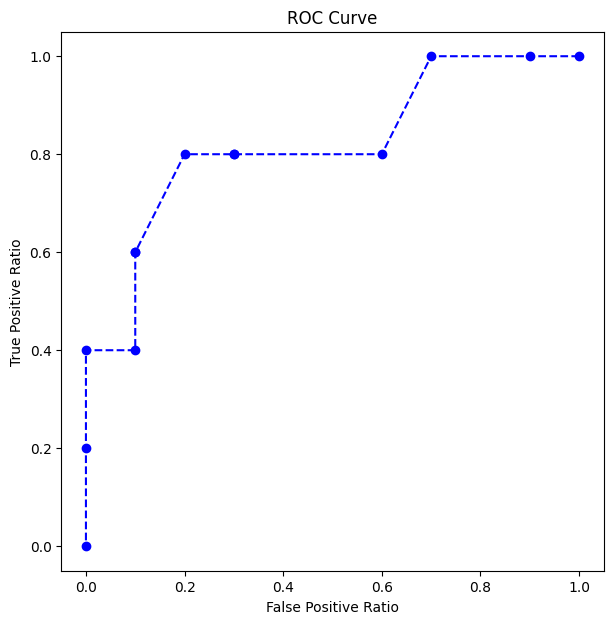

In [34]:
# plot ROC curve
df_confusion_metrix_graph = df_confusion_metrix.round(2)
plt.figure(figsize=(7, 7))
plt.plot(df_confusion_metrix_graph["FalsePositiveRatio"], df_confusion_metrix_graph["recall"], marker='o', linestyle='--', color='b')
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')
plt.show()

In [39]:
# calculate the area under the curve
from sklearn.metrics import auc
auc = auc(df_confusion_metrix["FalsePositiveRatio"], df_confusion_metrix["recall"])
print(round(auc, 2))

0.82


### Log-Loss
$$
\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$

Where:
$$
\begin{align*}
N & \text{ is the number of samples.} \\
y_i & \text{ is the actual label of the } i \text{-th sample (0 or 1).} \\
p_i & \text{ is the predicted probability of the } i \text{-th sample being in class 1.}
\end{align*}
$$


Why Log Loss?
* Probabilistic Predictions: Log loss considers the confidence of predictions by using the predicted probabilities, not just the final binary decision.
* Penalization: It heavily penalizes wrong predictions that are made with high confidence. For example, predicting a probability close to 1 when the actual class is 0 results in a high log loss.

Mean Absolute Error (MAE): 1.18
Mean Squared Error (MSE): 2.61
Root Mean Squared Error (RMSE): 1.62


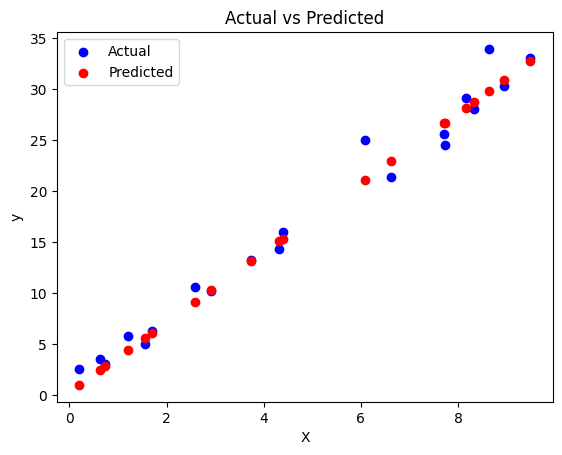

In [40]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create a dummy dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 samples, 1 feature
y = 3.5 * X.squeeze() + np.random.randn(100) * 2  # Linear relationship with some noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Optional: Plot the results
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()